<IPython.core.display.Javascript object>

(732, 5)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10)                150       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
Train on 505 samples
Epoch 1/10
505/505 [==============================] - 2s 3ms/sample - loss: 0.0130 - mae: 0.0837
Epoch 2/10
505/505 [==============================] - 0s 514us/sample - loss: 0.0061 - mae: 0.0592
Epoch 3/10
505/505 [==============================] - 0s 532us/sample - loss: 0.0051 - mae: 0.0546
Epoch 4/10
505/505 [==============================] - 0s 663us/sample - loss: 0.0046 - mae: 0.0488
Epoch 5/10
505/505 [==============================] - 0s 473us/sample - loss: 0.0041 - mae: 0.04

<IPython.core.display.Javascript object>

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10)                600       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 611
Trainable params: 611
Non-trainable params: 0
_________________________________________________________________
Train on 505 samples
Epoch 1/10
505/505 [==============================] - 3s 5ms/sample - loss: 0.3270 - mae: 0.4480
Epoch 2/10
505/505 [==============================] - 0s 727us/sample - loss: 0.1520 - mae: 0.2759
Epoch 3/10
505/505 [==============================] - 0s 806us/sample - loss: 0.0525 - mae: 0.1886
Epoch 4/10
505/505 [==============================] - 0s 729us/sample - loss: 0.0252 - mae: 0.1397
Epoch 5/10
505/505 [==============================] - 0s 605us/sample - loss: 0.0122 - mae: 0.0930
Epoc

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


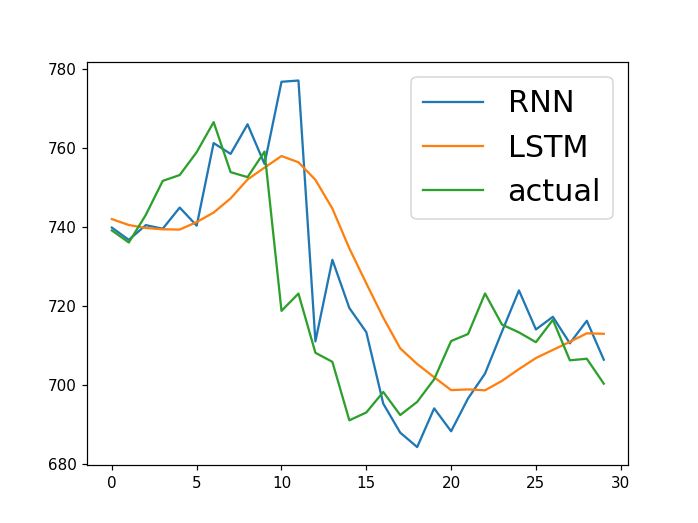

In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

# 정규화 함수 
def MinMaxScaler(data):
    denom = np.max(data,0)-np.min(data,0)
    nume = data-np.min(data,0)
    return nume/denom

# 정규화 되돌리기 함수 
def back_MinMax(data,value):
    diff = np.max(data,0)-np.min(data,0)
    back = value * diff + np.min(data,0)
    return back 

# 데이터 불러오기 
path = "/home/smsung/Downloads/DL_folder/"
xy = np.loadtxt(path+"data-02-stock_daily.csv", delimiter=",", skiprows=0+1+1)
xy = xy[::-1] # 역순으로 저장 

%matplotlib notebook
plt.plot(xy[:,4]) # 전체 종가
print(xy.shape)

seqLength = 7 # window size 
dataDim = 5 # 시가, 고가, 저가, 거래량 , 종가
hiddenDim = 10 
outputDim = 1
lr = 0.01
iterations = 500

trainSize = int(len(xy)*0.7)
trainSet = xy[0:trainSize]
testSet = xy[trainSize-seqLength:]

trainSet = MinMaxScaler(trainSet)
testSet = MinMaxScaler(testSet)


# 7일간의 5가지 데이터(시가, 종가, 고가, 저가, 거래량)를 받아와서 
# 바로 다음 날의 종가를 예측하는 모델로 구성

def buildDataSet(timeSeries, seqLength):
    xdata = []
    ydata = [] 
    for i in range(0, len(timeSeries)-seqLength):
        tx = timeSeries[i:i+seqLength,:-1]
        ty = timeSeries[i+seqLength,[-1]]
        xdata.append(tx)
        ydata.append(ty)
    return np.array(xdata), np.array(ydata)
    
trainX, trainY=buildDataSet(trainSet, seqLength)
testX, testY=buildDataSet(testSet, seqLength)

# 모델 구성 

# First, let's define a RNN Cell, as a layer subclass.
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()

model.add(layers.SimpleRNN(units=10, 
                           activation='tanh',
                           input_shape=[7,4]))

model.add(layers.Dense(1))

model.summary()

# 모델 학습과정 설정 
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# 모델 트레이닝 
hist = model.fit(trainX, trainY, epochs=10, batch_size=16)

# 모델 테스트 
res = model.evaluate(testX, testY, batch_size=16)
print("loss",res[0],"mae",res[1])

#7 모델 사용
xhat = testX
yhat = model.predict(xhat)
print(testY)
print(yhat)

print("Evaluate : {}".format(np.average((yhat - testY)**2)))
# 원래 값으로 되돌리기 
predict1 = back_MinMax(xy[trainSize-seqLength:,[-1]],yhat)
actual = back_MinMax(xy[trainSize-seqLength:,[-1]],testY)
print("예측값",predict1)
print("실제값",actual)

print(predict1.shape)
print(actual.shape)

%matplotlib notebook
plt.figure()
plt.plot(predict1[:30], label = "predict_RNN")
plt.plot(actual[:30],label = "actual")

plt.legend(prop={'size': 20})

model2 = keras.Sequential()

model2.add(layers.LSTM(units=10, 
                           activation='tanh',
                           input_shape=[7,4]))

model2.add(layers.Dense(1))

model2.summary()

# 모델 학습과정 설정 
model2.compile(loss='mse', optimizer='adam', metrics=['mae'])

# 모델 트레이닝 
hist = model2.fit(trainX, trainY, epochs=10, batch_size=16)

# 모델 테스트 
res2 = model2.evaluate(testX, testY, batch_size=16)
print("loss",res2[0],"mae",res2[1])

#7 모델 사용
xhat = testX
yhat = model2.predict(xhat)
print(testY)
print(yhat)

print("Evaluate : {}".format(np.average((yhat - testY)**2)))
# 원래 값으로 되돌리기 
predict2 = back_MinMax(xy[trainSize-seqLength:,[-1]],yhat)
actual = back_MinMax(xy[trainSize-seqLength:,[-1]],testY)
print("예측값",predict2)
print("실제값",actual)
%matplotlib notebook
plt.figure()
plt.plot(predict2[:30], label = "predict_LSTM")
plt.plot(actual[:30],label = "actual")

plt.legend(prop={'size': 20})

%matplotlib notebook
plt.figure()
day=30
plt.plot(predict1[:day], label = "RNN")
plt.plot(predict2[:day], label = "LSTM")
plt.plot(actual[:day],label = "actual")

plt.legend(prop={'size': 20})